<a href="https://colab.research.google.com/github/piumalnipun9/Assignment-1-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Assignment_1_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_path = "/content/drive/MyDrive/A1- Images/emma.jpg"

# Read as grayscale
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Couldn't read the image. Check 'img_path' or upload an image.")

# Segment 1
lut = np.zeros(256, dtype=np.uint8)
lut[0:51] = np.arange(0, 51)

# Segment 2
x = np.arange(51, 150)
y = 100 + 1.55 * (x - 50)
lut[51:150] = np.clip(np.rint(y), 0, 255)

# Segment 3
lut[150:256] = np.arange(150, 256)

out = cv.LUT(img, lut)

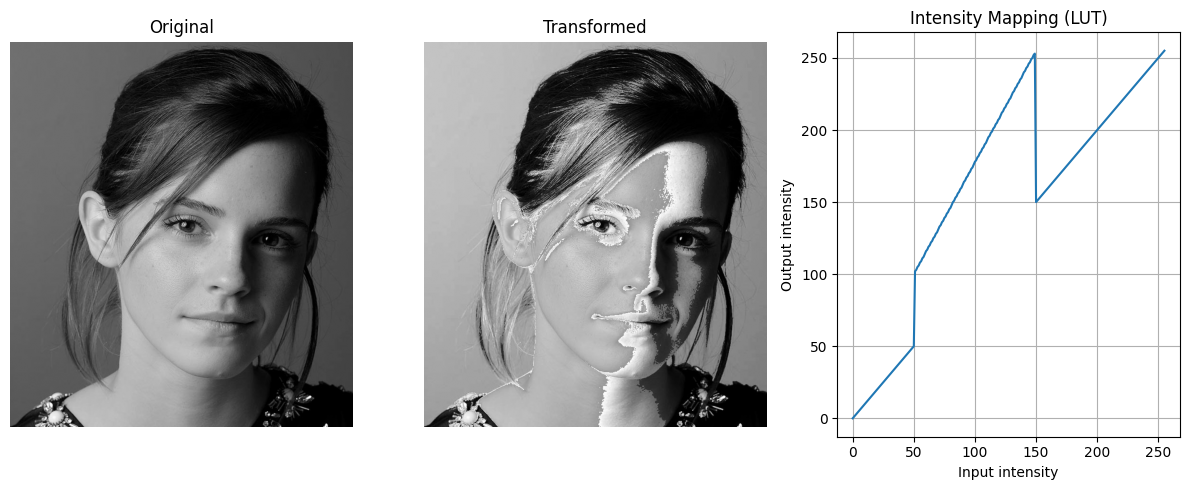

Saved: transformed.png


In [4]:
#plot images

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.title("Transformed")
plt.axis('off')

plt.subplot(1,3,3)
plt.plot(np.arange(256), lut)
plt.title("Intensity Mapping (LUT)")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save result
cv.imwrite("transformed.png", out)
print("Saved:", "transformed.png")

# Question 2

In [7]:
img_path = "/content/drive/MyDrive/A1- Images/brain_proton_density_slice.png"   # <- change to your file
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "Set a valid image path"

# 2) Two cut points (mid-tones ≈ gray matter, highs ≈ white matter)
# thresholds
gray_band_start   = 140   # start of gray-matter band
white_matter_start = 180  # start of white/bright band

# --- White matter: keep x>=white_matter_start, zero below ---
wm = np.zeros(256, dtype=np.uint8)
wm[white_matter_start:] = np.arange(white_matter_start, 256, dtype=np.uint8)

# --- Gray matter: keep gray_band_start <= x <= white_matter_start, zero outside ---
gm = np.zeros(256, dtype=np.uint8)
gm[gray_band_start:white_matter_start+1] = np.arange(gray_band_start, white_matter_start+1, dtype=np.uint8)

# Apply
wm_img = cv.LUT(img, wm)
gm_img = cv.LUT(img, gm)


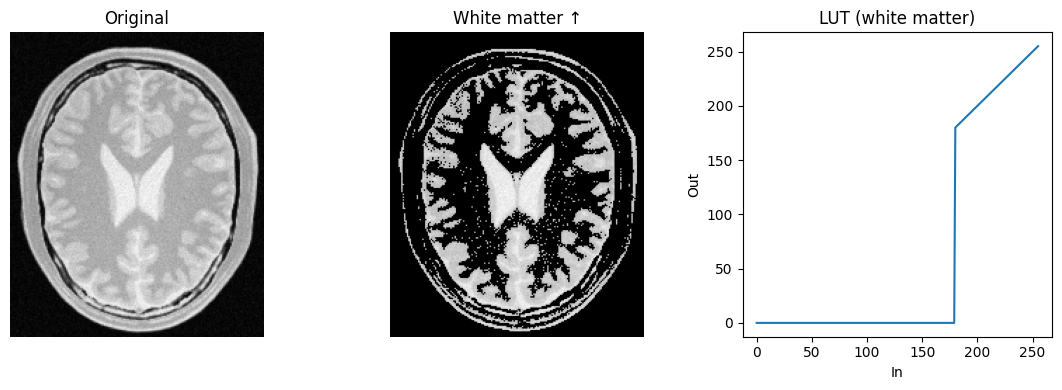

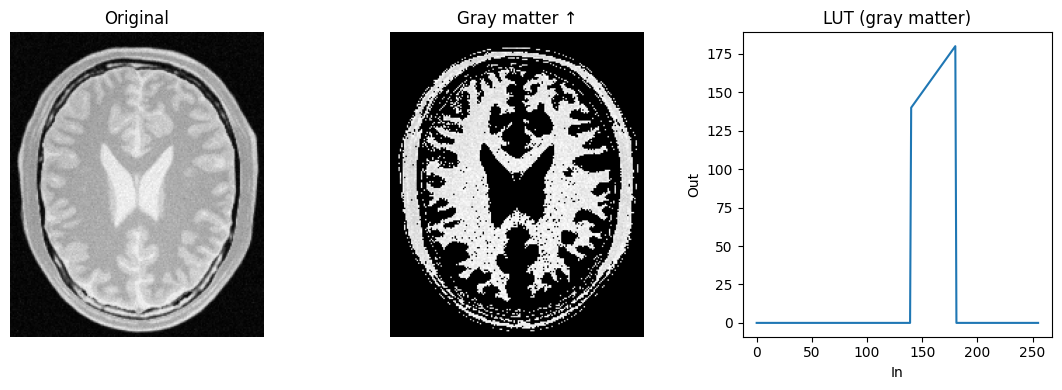

In [8]:
plt.figure(figsize=(11,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray');    plt.title("Original");            plt.axis('off')
plt.subplot(1,3,2); plt.imshow(wm_img, cmap='gray'); plt.title("White matter ↑");      plt.axis('off')
plt.subplot(1,3,3); plt.plot(x, wm);                 plt.title("LUT (white matter)");  plt.xlabel("In"); plt.ylabel("Out"); plt.tight_layout(); plt.show()

plt.figure(figsize=(11,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray');    plt.title("Original");           plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gm_img, cmap='gray'); plt.title("Gray matter ↑");      plt.axis('off')
plt.subplot(1,3,3); plt.plot(x, gm);                 plt.title("LUT (gray matter)");  plt.xlabel("In"); plt.ylabel("Out"); plt.tight_layout(); plt.show()


# Question 3

In [9]:
img_path = "/content/drive/MyDrive/A1- Images/highlights_and_shadows.jpg"
img = cv.imread(img_path)

assert img is not None, "Provide a valid image."
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# --- Gamma on L channel (Lab) ---
gamma_value = 0.78   # <1 brightens, >1 darkens; state this value in your report
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

L_f = L.astype(np.float32) / 255.0
L_corr = np.clip((L_f ** gamma_value) * 255.0, 0, 255).astype(np.uint8)

lab_corr = cv.merge([L_corr, a, b])
rgb_corr = cv.cvtColor(lab_corr, cv.COLOR_LAB2RGB)

Gamma used: 0.78


Gamma used: 0.78


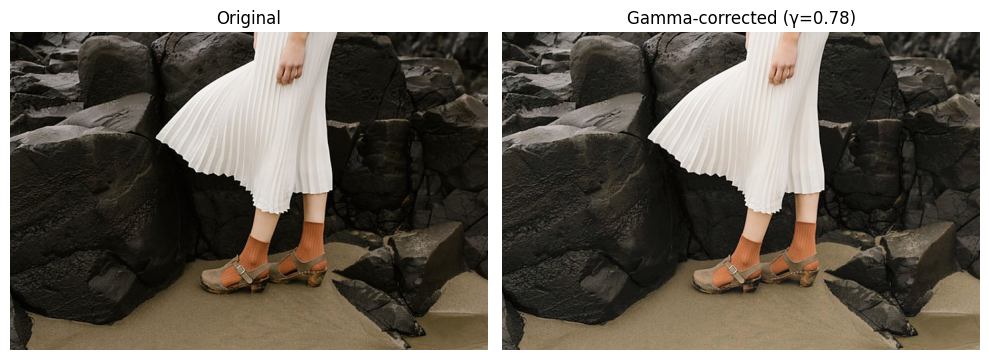

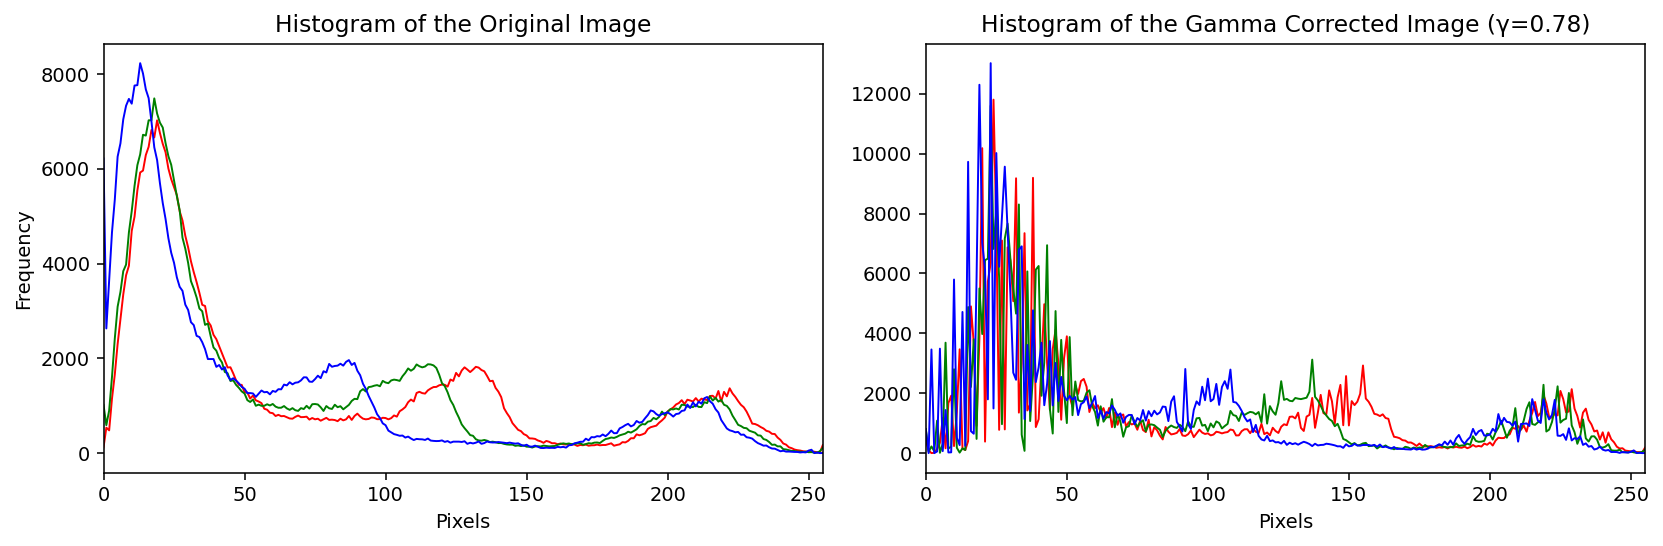

In [16]:
print("Gamma used:", gamma_value)

# Show images
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(rgb);       plt.title("Original");   plt.axis('off')
plt.subplot(1,2,2); plt.imshow(rgb_corr);  plt.title(f"Gamma-corrected (γ={gamma_value})"); plt.axis('off')
plt.tight_layout(); plt.show()

# Histograms of L (original vs corrected), side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=140)
# Left: original
for c, col in enumerate(('r','g','b')):
    h, _ = np.histogram(rgb[..., c].ravel(), bins=256, range=(0,256))
    axs[0].plot(x, h, color=col, linewidth=1)
axs[0].set_title("Histogram of the Original Image")
axs[0].set_xlabel("Pixels"); axs[0].set_ylabel("Frequency"); axs[0].set_xlim(0,255)

# Right: gamma-corrected
for c, col in enumerate(('r','g','b')):
    h, _ = np.histogram(rgb_corr[..., c].ravel(), bins=256, range=(0,256))
    axs[1].plot(x, h, color=col, linewidth=1)
axs[1].set_title(f"Histogram of the Gamma Corrected Image (γ={gamma_value})")
axs[1].set_xlabel("Pixels"); axs[1].set_xlim(0,255)

plt.tight_layout(); plt.show()